In [1]:
import awkward as ak
import pickle
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-r6jxrasc because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Unphysical dataset 1.2- 3.6 GeV

In [37]:
class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        # print(events.jetadR)
        # dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        # dR_axis = hist.axis.Regular(10, 0, 0.5, name="dR", label="Jet A dR")
        dataset = events.metadata['dataset']
        # print("jetE--------------------",events.jetE)
        jet = ak.zip(
            {
                "jetM": ak.flatten(events.jetM),
                "jetPt": ak.flatten(events.jetPt),
                # "jetE": ak.flatten(events.jetE),
                "jetadR":ak.flatten(events.jetadR),
                "TaudR":ak.flatten(events.TaudR),
                "Tau1dR":ak.flatten(events.Tau1dR),
                "Tau2dR":ak.flatten(events.Tau2dR),
                "a_m": ak.flatten(events.a_m),
                "a_pt": ak.flatten(events.a_pt),
                # "a_eta":ak.flatten(events.a_eta),
                # "a_phi":ak.flatten(events.a_phi),
                "Tau1pT":ak.flatten(events.Tau1pT),
                "Tau2pT":ak.flatten(events.Tau2pT),
                "NrecoTaus": ak.flatten(events.NrecoTaus),
                "NGenTaus": ak.flatten(events.NGenTaus),
                "recoTau1dR": ak.flatten(events.recoTau1dR),
                "recoTau2dR": ak.flatten(events.recoTau2dR),
                "n1dR": ak.flatten(events.n1dR),
                "n2dR": ak.flatten(events.n2dR),
                
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
        jetmass = jet.jetM[jet.jetM > -22.22]
        amass = jet.a_m[jet.a_m > -22.22]
        jetpt = jet.jetPt[jet.jetPt>-22.22]
        apt = jet.a_pt[jet.a_pt>-22.22]
        # aeta = jet.a_eta[jet.a_eta>-22.22]
        # aphi = jet.a_phi[jet.a_phi>-22.22]
        tau1pt = jet.Tau1pT[jet.Tau1pT>-22.22]
        tau2pt = jet.Tau2pT[jet.Tau2pT>-22.22]
        recotau1dr = jet.recoTau1dR[jet.recoTau1dR>-22.22]
        recotau2dr = jet.recoTau2dR[jet.recoTau2dR>-22.22]
        n1dr = jet.n1dR[jet.n1dR>-22.22]
        n2dr = jet.n2dR[jet.n2dR>-22.22]
        tau1dr = jet.Tau1dR[jet.Tau1dR>-22.22]
        tau2dr = jet.Tau2dR[jet.Tau2dR>-22.22]
        taudr = jet.TaudR[jet.TaudR>-22.22]
        adr = jet.jetadR[jet.jetadR>-22.22]
        gentau = jet.NGenTaus[jet.NGenTaus > -22.22]
        recotau = jet.NrecoTaus[jet.NrecoTaus > -22.22]
        
        # Jet mass -----------------------------------------------------------

        jet_mass = (
            hist.Hist.new
            .StrCat(["jet mass"], name="hmassjet")
            .Reg(54, 0, 20, name="massjet", label="Mass [GeV]")
            .Int64()
        )
        jet_mass.fill(hmassjet="jet mass", massjet=jetmass)
        
        # A mass  -----------------------------------------------------------
        
        A_mass = (
            hist.Hist.new
            .StrCat(["A mass"], name="hmassa")
            .Reg(8, 1.2, 3.6, name="massa", label="Mass [GeV]")
            .Int64()
        )
        A_mass.fill(hmassa="A mass", massa=amass)

        # JET PT -----------------------------------------------------------
        
        jet_pt = (
            hist.Hist.new
            .StrCat(["jet_pt"], name="hjetpt")
            .Reg(38, 10, 300, name="pt_jet", label="pT [GeV]")
            .Int64()
        )
        
        jet_pt.fill(hjetpt="jet_pt", pt_jet=jetpt)

        # A pt  -----------------------------------------------------------
        
        A_pt = (
            hist.Hist.new
            .StrCat([ "A_pt"], name="hapt")
            .Reg(56, 30, 300, name="pt_a", label="pT [GeV]")
            .Int64()
        )
        
        A_pt.fill(hapt="A_pt", pt_a=apt)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau1_pt = (
            hist.Hist.new
            .StrCat([ "Tau1_pt"], name="htau1pt")
            .Reg(19, 10, 200, name="pt_tau1", label="pT [GeV]")
            .Int64()
        )
        
        Tau1_pt.fill(htau1pt="Tau1_pt", pt_tau1=tau1pt)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau2_pt = (
            hist.Hist.new
            .StrCat([ "Tau2_pt"], name="htau2pt")
            .Reg(19, 10, 200, name="pt_tau2", label="pT [GeV]")
            .Int64()
        )
        
        Tau2_pt.fill(htau2pt="Tau2_pt", pt_tau2=tau2pt)
        
#         # A eta -----------------------------------------------------------
        
#         A_eta = (
#             hist.Hist.new
#             .StrCat([ "A_ata"], name="haeta")
#             .Reg(10, -5, 5, name="eta_a", label="eta")
#             .Int64()
#         )
        
#         A_eta.fill(haeta="A_eta", eta_a=aeta)
       
#         # A phi -----------------------------------------------------------
#         A_phi = (
#             hist.Hist.new
#             .StrCat([ "A_phi"], name="haphi")
#             .Reg(10, -3.2, 3.2, name="phi_a", label="phi")
#             .Int64()
#         )
        
#         A_phi.fill(haphi="A_phi", phi_a=aphi)
        
        # a nad jet dR -----------------------------------------------------------
        
        
        a_jet_dR = (
            hist.Hist.new
            .StrCat(["a_jet_dR"], name="hajetdR")
            .Reg(10, 0.0, 0.5, name="ajetdr", label="dR")
            .Int64()
        )
        a_jet_dR.fill(hajetdR="a_jet_dR", ajetdr=adr)
        
        # gen tau1 jet dR -----------------------------------------------------------
        
        tau1_jet_dR = (
            hist.Hist.new
            .StrCat(["tau1_dr"], name="htau1jetdR")
            .Reg(10, 0.0, 0.5, name="tau1jetdr", label="dR")
            .Int64()
        )
        tau1_jet_dR.fill(htau1jetdR="tau1_dr", tau1jetdr=tau1dr)
        
        # gen tau2 jet dR -----------------------------------------------------------
        
        tau2_jet_dR = (
            hist.Hist.new
            .StrCat(["tau2_dr"], name="htau2jetdR")
            .Reg(10, 0.0, 0.5, name="tau2jetdr", label="dR")
            .Int64()
        )
        tau2_jet_dR.fill(htau2jetdR="tau2_dr", tau2jetdr=tau2dr)
        
                
        # reco tau1 jet dR -----------------------------------------------------------
        
        recotau1_jet_dR = (
            hist.Hist.new
            .StrCat(["recotau1_dr"], name="hrecotau1jetdR")
            .Reg(10, 0.0, 0.5, name="recotau1jetdr", label="dR")
            .Int64()
        )
        recotau1_jet_dR.fill(hrecotau1jetdR="recotau1_dr", recotau1jetdr=recotau1dr)
        
       # reco tau2 jet dR -----------------------------------------------------------
        
        recotau2_jet_dR = (
            hist.Hist.new
            .StrCat(["recotau2_dr"], name="hrecotau2jetdR")
            .Reg(10, 0.0, 0.5, name="recotau2jetdr", label="dR")
            .Int64()
        )
        recotau2_jet_dR.fill(hrecotau2jetdR="recotau2_dr", recotau2jetdr=recotau2dr)
        
        #gen tau1 tau2 dR -----------------------------------------------------------
        
        taus_dR = (
            hist.Hist.new
            .StrCat(["taus_dr"], name="htausdR")
            .Reg(10, 0.0, 0.5, name="tau_tau_dr", label="dR")
            .Int64()
        )
        taus_dR.fill(htausdR="taus_dr", tau_tau_dr=taudr)
        
        
        
        
        
        # number of gen taus -----------------------------------------------------------
        
        gen_Tau = (
                    hist.Hist.new
                    .StrCat(["gen_tau"], name="hgentau")
                    .Reg(5, 0, 5., name="gtau", label="Number of Tau")
                    .Int64()
                )
        gen_Tau.fill(hgentau="gen_tau", gtau=gentau)
            
            
        # number of reco taus -----------------------------------------------------------
        
        reco_Tau = (
                    hist.Hist.new
                    .StrCat(["reco_tau"], name="hrecotau")
                    .Reg(5, 0, 5., name="rtau", label="Number of Tau")
                    .Int64()
                )
        reco_Tau.fill(hrecotau="reco_tau", rtau=recotau)
        
        #A maas and pT plot----------------------------------------------------------------------------------
        A_mass_pt = (
            hist.Hist.new
            
            .Reg(8, 1.2, 3.6, name="massa", label="Mass [GeV]")
            .Reg(56, 30, 300, name="pt_a", label="pT [GeV]").Int64()
        )
        A_mass_pt.fill(massa=amass, pt_a=apt)
       
        
        
        
        return {
            dataset: {
                "entries": len(events),
                "jet_mass":jet_mass,
                "a_mass":A_mass,
                "jet_pt":jet_pt,
                "a_pt":A_pt,
                "tau1_pt":Tau1_pt,
                "tau2_pt":Tau2_pt,
                # "a_eta":A_eta,
                # "a_phi":A_phi,
                "tau1_jet_dr":tau1_jet_dR,
                "tau2_jet_dr":tau2_jet_dR,
                "taus_dr":taus_dR,
                "a_jet_dr":a_jet_dR,
                "recotau1_jet_dr":recotau1_jet_dR,
                "recotau2_jet_dr":recotau2_jet_dR,
                "number_gen_tau":gen_Tau,
                "number_reco_tau":reco_Tau,
                "a_mass_pt":A_mass_pt,
                # "amass":amass,
               
            }
        }

    def postprocess(self, accumulator):
        pass

In [57]:
# with open("ATo2Tau_m1p2To3p6_pt30To300_0000.json", "r") as fin:
#     file_list_train_0 = json.load(fin)
with open("ATo2Tau_m1p2To3p6_pt30To300_0001.json", "r") as fin:
    file_list_train_1 = json.load(fin)   
    
             
fileset = {
    # 'train_mass_unphy_0': file_list_train_0 
    'train_mass_unphy_1': file_list_train_1 
                  
}
# fileset

In [58]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=8),
    schema=BaseSchema,
    # maxchunks=1,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    # "RHTree",
    processor_instance=MyProcessor()
)
# out

# Save the 'out' object to a file
with open('ATo2Tau_m1p2To3p6_pt30To300_0001.pkl', 'wb') as f:
    pickle.dump(out, f)

print("Output saved to 'ATo2Tau_m1p2To3p6_pt30To300_0000.pkl'")

Output()

Output()

Output saved to 'ATo2Tau_m1p2To3p6_pt30To300_0000.pkl'


In [59]:
with open('ATo2Tau_m1p2To3p6_pt30To300_0001.pkl', 'rb') as f:
    out = pickle.load(f)

out

{'train_mass_unphy_1': {'entries': 249000,
  'jet_mass': Hist(
    StrCategory(['jet mass'], name='hmassjet'),
    Regular(54, 0, 20, name='massjet', label='Mass [GeV]'),
    storage=Int64()) # Sum: 327110.0 (487017.0 with flow),
  'a_mass': Hist(
    StrCategory(['A mass'], name='hmassa'),
    Regular(8, 1.2, 3.6, name='massa', label='Mass [GeV]'),
    storage=Int64()) # Sum: 487017.0,
  'jet_pt': Hist(
    StrCategory(['jet_pt'], name='hjetpt'),
    Regular(38, 10, 300, name='pt_jet', label='pT [GeV]'),
    storage=Int64()) # Sum: 484358.0 (487017.0 with flow),
  'a_pt': Hist(
    StrCategory(['A_pt'], name='hapt'),
    Regular(56, 30, 300, name='pt_a', label='pT [GeV]'),
    storage=Int64()) # Sum: 487017.0,
  'tau1_pt': Hist(
    StrCategory(['Tau1_pt'], name='htau1pt'),
    Regular(19, 10, 200, name='pt_tau1', label='pT [GeV]'),
    storage=Int64()) # Sum: 441953.0 (487017.0 with flow),
  'tau2_pt': Hist(
    StrCategory(['Tau2_pt'], name='htau2pt'),
    Regular(19, 10, 200, name=

In [60]:
# fig, ax = plt.subplots()
# out["train_mass"]["tau1_pt"].plot1d(ax=ax,histtype='step',color="r")
# out["train_mass"]["tau2_pt"].plot1d(ax=ax,histtype='step',color="b")
# # ax.set_yscale("log")
# ax.legend(title="pT Dist")
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

In [61]:
# fig, ax = plt.subplots()
# out["train_mass"]["a_mass"].plot1d(ax=ax,histtype='step',color='b')
# out["train_mass"]["jet_mass"].plot1d(ax=ax,histtype='step', color='r')
# # ax.set_yscale("log")
# ax.legend(title="Mass Dist")
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

In [62]:
# fig, ax = plt.subplots()
# out["train_mass"]["a_mass"].plot1d(ax=ax)
# ax.set_yscale("log")
# ax.legend(title="Mass Dist")
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

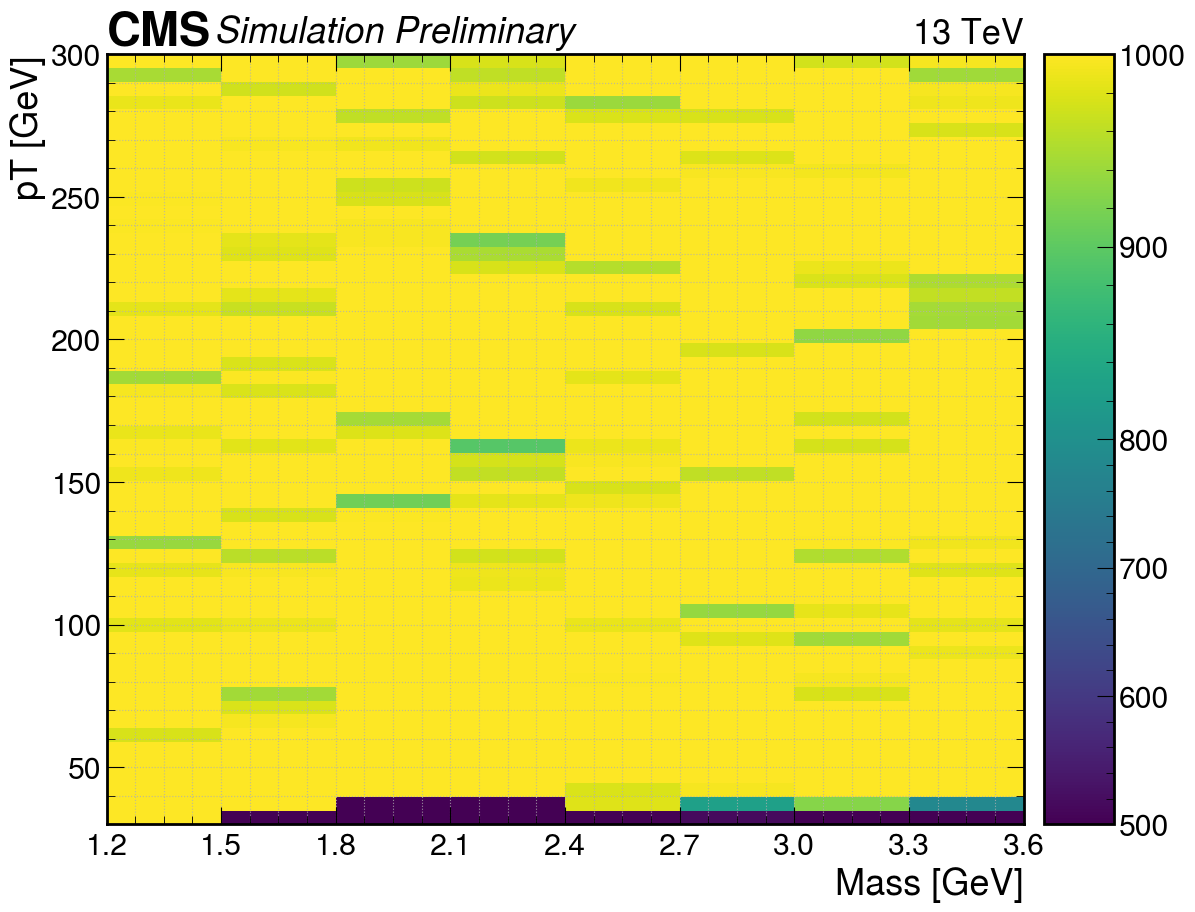

In [63]:
fig, ax = plt.subplots(figsize=(13,10))
norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 1000, vcenter=800)
out["train_mass_unphy_1"]["a_mass_pt"].plot2d(ax=ax, norm =norm)
# ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
# ax.set_yticks(np.arange(20, 200, 5), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

In [64]:
# Access the 2D histogram
A_mass_pt = out["train_mass_unphy_1"]["a_mass_pt"]

# Get the edges for each axis
mass_edges = A_mass_pt.axes[0].edges
pt_edges = A_mass_pt.axes[1].edges

# Print the bin edges
print("Mass Bin Edges:", mass_edges)
print("Pt Bin Edges:", pt_edges)

# Get the bin entries (counts in each bin)
bin_entries = A_mass_pt.values()

# print("min: ",min(bin_entries.flatten()), "max: ", max(bin_entries.flatten()), "mean: ", np.mean(bin_entries.flatten()))
outlist =bin_entries.flatten()
print("min---", min(outlist), "max---", max(outlist), "mean---", np.mean(outlist))
outstr = ""
# for i in range(len(outlist)):
for i in range(len(np.arange(1.6,3.7,0.4))*len(np.arange(35,301,5))):
  if (i%len(np.arange(35,301,5)) == 0) and (i != 0):
    outstr += '\n'
  outstr += str(int(outlist[i])) + ', '

print(outstr)

Mass Bin Edges: [1.2 1.5 1.8 2.1 2.4 2.7 3.  3.3 3.6]
Pt Bin Edges: [ 30.          34.82142857  39.64285714  44.46428571  49.28571429
  54.10714286  58.92857143  63.75        68.57142857  73.39285714
  78.21428571  83.03571429  87.85714286  92.67857143  97.5
 102.32142857 107.14285714 111.96428571 116.78571429 121.60714286
 126.42857143 131.25       136.07142857 140.89285714 145.71428571
 150.53571429 155.35714286 160.17857143 165.         169.82142857
 174.64285714 179.46428571 184.28571429 189.10714286 193.92857143
 198.75       203.57142857 208.39285714 213.21428571 218.03571429
 222.85714286 227.67857143 232.5        237.32142857 242.14285714
 246.96428571 251.78571429 256.60714286 261.42857143 266.25
 271.07142857 275.89285714 280.71428571 285.53571429 290.35714286
 295.17857143 300.        ]
min--- 38 max--- 5621 mean--- 1087.091517857143
1321, 1323, 1104, 1059, 1050, 1021, 976, 1055, 1063, 1016, 1021, 1069, 1062, 1026, 982, 1089, 1004, 1029, 985, 1031, 939, 1009, 1013, 1098, 106

### Unphysical dataset 0000 
min--- 58 max--- 5997 mean--- 1170.0066964285713


### Unphysical dataset 0001 
min--- 38 max--- 5621 mean--- 1087.091517857143 


### Physical dataset 0000
min--- 180 max--- 487 mean--- 265.80109126984127

### Physucal dataset 0001
min--- 189 max--- 494 mean--- 266.19146825396825


### Physucal dataset 0002
min--- 189 max--- 490 mean--- 265.7752976190476


### Physucal dataset 0003
min--- 178 max--- 490 mean--- 266.0257936507937


### Physucal dataset 0004
min--- 180 max--- 482 mean--- 266.1235119047619


### Physucal dataset 0005
min--- 178 max--- 489 mean--- 264.95238095238096


### Physucal dataset 0006
min--- 185 max--- 482 mean--- 266.13144841269843


### Physucal dataset 0007
min--- 181 max--- 477 mean--- 266.4905753968254


### Physucal dataset 0008
min--- 179 max--- 481 mean--- 266.35515873015873


### Physucal dataset 0009
min--- 177 max--- 489 mean--- 262.81597222222223

# Physical dataset 3.6-18 GeV

In [3]:
class MyProcessor_phy(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        # print(events.jetadR)
        # dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        # dR_axis = hist.axis.Regular(10, 0, 0.5, name="dR", label="Jet A dR")
        dataset = events.metadata['dataset']
        # print("jetE--------------------",events.jetE)
        jet = ak.zip(
            {
                "jetM": ak.flatten(events.jetM),
                "jetPt": ak.flatten(events.jetPt),
                # "jetE": ak.flatten(events.jetE),
                "jetadR":ak.flatten(events.jetadR),
                "TaudR":ak.flatten(events.TaudR),
                "Tau1dR":ak.flatten(events.Tau1dR),
                "Tau2dR":ak.flatten(events.Tau2dR),
                "a_m": ak.flatten(events.a_m),
                "a_pt": ak.flatten(events.a_pt),
                # "a_eta":ak.flatten(events.a_eta),
                # "a_phi":ak.flatten(events.a_phi),
                "Tau1pT":ak.flatten(events.Tau1pT),
                "Tau2pT":ak.flatten(events.Tau2pT),
                "NrecoTaus": ak.flatten(events.NrecoTaus),
                "NGenTaus": ak.flatten(events.NGenTaus),
                "recoTau1dR": ak.flatten(events.recoTau1dR),
                "recoTau2dR": ak.flatten(events.recoTau2dR),
                "n1dR": ak.flatten(events.n1dR),
                "n2dR": ak.flatten(events.n2dR),
                
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
        jetmass = jet.jetM[jet.jetM > -22.22]
        amass = jet.a_m[jet.a_m > -22.22]
        jetpt = jet.jetPt[jet.jetPt>-22.22]
        apt = jet.a_pt[jet.a_pt>-22.22]
        # aeta = jet.a_eta[jet.a_eta>-22.22]
        # aphi = jet.a_phi[jet.a_phi>-22.22]
        tau1pt = jet.Tau1pT[jet.Tau1pT>-22.22]
        tau2pt = jet.Tau2pT[jet.Tau2pT>-22.22]
        recotau1dr = jet.recoTau1dR[jet.recoTau1dR>-22.22]
        recotau2dr = jet.recoTau2dR[jet.recoTau2dR>-22.22]
        n1dr = jet.n1dR[jet.n1dR>-22.22]
        n2dr = jet.n2dR[jet.n2dR>-22.22]
        tau1dr = jet.Tau1dR[jet.Tau1dR>-22.22]
        tau2dr = jet.Tau2dR[jet.Tau2dR>-22.22]
        taudr = jet.TaudR[jet.TaudR>-22.22]
        adr = jet.jetadR[jet.jetadR>-22.22]
        gentau = jet.NGenTaus[jet.NGenTaus > -22.22]
        recotau = jet.NrecoTaus[jet.NrecoTaus > -22.22]
        
        # Jet mass -----------------------------------------------------------

        jet_mass = (
            hist.Hist.new
            .StrCat(["jet mass"], name="hmassjet")
            .Reg(108, 0, 40, name="massjet", label="Mass [GeV]")
            .Int64()
        )
        jet_mass.fill(hmassjet="jet mass", massjet=jetmass)
        
        # A mass  -----------------------------------------------------------
        
        A_mass = (
            hist.Hist.new
            .StrCat(["A mass"], name="hmassa")
            .Reg(36, 3.6, 18, name="massa", label="Mass [GeV]")
            .Int64()
        )
        A_mass.fill(hmassa="A mass", massa=amass)

        # JET PT -----------------------------------------------------------
        
        jet_pt = (
            hist.Hist.new
            .StrCat(["jet_pt"], name="hjetpt")
            .Reg(38, 10, 300, name="pt_jet", label="pT [GeV]")
            .Int64()
        )
        
        jet_pt.fill(hjetpt="jet_pt", pt_jet=jetpt)

        # A pt  -----------------------------------------------------------
        
        A_pt = (
            hist.Hist.new
            .StrCat([ "A_pt"], name="hapt")
            .Reg(56, 30, 300, name="pt_a", label="pT [GeV]")
            .Int64()
        )
        
        A_pt.fill(hapt="A_pt", pt_a=apt)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau1_pt = (
            hist.Hist.new
            .StrCat([ "Tau1_pt"], name="htau1pt")
            .Reg(19, 10, 200, name="pt_tau1", label="pT [GeV]")
            .Int64()
        )
        
        Tau1_pt.fill(htau1pt="Tau1_pt", pt_tau1=tau1pt)
        
        # gen Tau1 pt -----------------------------------------------------------
        
        Tau2_pt = (
            hist.Hist.new
            .StrCat([ "Tau2_pt"], name="htau2pt")
            .Reg(19, 10, 200, name="pt_tau2", label="pT [GeV]")
            .Int64()
        )
        
        Tau2_pt.fill(htau2pt="Tau2_pt", pt_tau2=tau2pt)
        
#         # A eta -----------------------------------------------------------
        
#         A_eta = (
#             hist.Hist.new
#             .StrCat([ "A_ata"], name="haeta")
#             .Reg(10, -5, 5, name="eta_a", label="eta")
#             .Int64()
#         )
        
#         A_eta.fill(haeta="A_eta", eta_a=aeta)
       
#         # A phi -----------------------------------------------------------
#         A_phi = (
#             hist.Hist.new
#             .StrCat([ "A_phi"], name="haphi")
#             .Reg(10, -3.2, 3.2, name="phi_a", label="phi")
#             .Int64()
#         )
        
#         A_phi.fill(haphi="A_phi", phi_a=aphi)
        
        # a nad jet dR -----------------------------------------------------------
        
        
        a_jet_dR = (
            hist.Hist.new
            .StrCat(["a_jet_dR"], name="hajetdR")
            .Reg(10, 0.0, 0.5, name="ajetdr", label="dR")
            .Int64()
        )
        a_jet_dR.fill(hajetdR="a_jet_dR", ajetdr=adr)
        
        # gen tau1 jet dR -----------------------------------------------------------
        
        tau1_jet_dR = (
            hist.Hist.new
            .StrCat(["tau1_dr"], name="htau1jetdR")
            .Reg(10, 0.0, 0.5, name="tau1jetdr", label="dR")
            .Int64()
        )
        tau1_jet_dR.fill(htau1jetdR="tau1_dr", tau1jetdr=tau1dr)
        
        # gen tau2 jet dR -----------------------------------------------------------
        
        tau2_jet_dR = (
            hist.Hist.new
            .StrCat(["tau2_dr"], name="htau2jetdR")
            .Reg(10, 0.0, 0.5, name="tau2jetdr", label="dR")
            .Int64()
        )
        tau2_jet_dR.fill(htau2jetdR="tau2_dr", tau2jetdr=tau2dr)
        
                
        # reco tau1 jet dR -----------------------------------------------------------
        
        recotau1_jet_dR = (
            hist.Hist.new
            .StrCat(["recotau1_dr"], name="hrecotau1jetdR")
            .Reg(10, 0.0, 0.5, name="recotau1jetdr", label="dR")
            .Int64()
        )
        recotau1_jet_dR.fill(hrecotau1jetdR="recotau1_dr", recotau1jetdr=recotau1dr)
        
       # reco tau2 jet dR -----------------------------------------------------------
        
        recotau2_jet_dR = (
            hist.Hist.new
            .StrCat(["recotau2_dr"], name="hrecotau2jetdR")
            .Reg(10, 0.0, 0.5, name="recotau2jetdr", label="dR")
            .Int64()
        )
        recotau2_jet_dR.fill(hrecotau2jetdR="recotau2_dr", recotau2jetdr=recotau2dr)
        
        #gen tau1 tau2 dR -----------------------------------------------------------
        
        taus_dR = (
            hist.Hist.new
            .StrCat(["taus_dr"], name="htausdR")
            .Reg(10, 0.0, 0.5, name="tau_tau_dr", label="dR")
            .Int64()
        )
        taus_dR.fill(htausdR="taus_dr", tau_tau_dr=taudr)
        
        
        
        
        
        # number of gen taus -----------------------------------------------------------
        
        gen_Tau = (
                    hist.Hist.new
                    .StrCat(["gen_tau"], name="hgentau")
                    .Reg(5, 0, 5., name="gtau", label="Number of Tau")
                    .Int64()
                )
        gen_Tau.fill(hgentau="gen_tau", gtau=gentau)
            
            
        # number of reco taus -----------------------------------------------------------
        
        reco_Tau = (
                    hist.Hist.new
                    .StrCat(["reco_tau"], name="hrecotau")
                    .Reg(5, 0, 5., name="rtau", label="Number of Tau")
                    .Int64()
                )
        reco_Tau.fill(hrecotau="reco_tau", rtau=recotau)
        
        #A maas and pT plot----------------------------------------------------------------------------------
        A_mass_pt = (
            hist.Hist.new
            
            .Reg(36,  3.6, 18, name="massa", label="Mass [GeV]")
            .Reg(56, 30, 300, name="pt_a", label="pT [GeV]").Int64()
        )
        A_mass_pt.fill(massa=amass, pt_a=apt)
       
        
        
        
        return {
            dataset: {
                "entries": len(events),
                "jet_mass":jet_mass,
                "a_mass":A_mass,
                "jet_pt":jet_pt,
                "a_pt":A_pt,
                "tau1_pt":Tau1_pt,
                "tau2_pt":Tau2_pt,
                # "a_eta":A_eta,
                # "a_phi":A_phi,
                "tau1_jet_dr":tau1_jet_dR,
                "tau2_jet_dr":tau2_jet_dR,
                "taus_dr":taus_dR,
                "a_jet_dr":a_jet_dR,
                "recotau1_jet_dr":recotau1_jet_dR,
                "recotau2_jet_dr":recotau2_jet_dR,
                "number_gen_tau":gen_Tau,
                "number_reco_tau":reco_Tau,
                "a_mass_pt":A_mass_pt,
                # "amass":amass,
               
            }
        }

    def postprocess(self, accumulator):
        pass

In [31]:
# with open("ATo2Tau_m3p6To18_pt30To300_0000.json", "r") as fin:
#     train_mass_phy_0 = json.load(fin)
# with open("ATo2Tau_m3p6To18_pt30To300_0001.json", "r") as fin:
#     train_mass_phy_1 = json.load(fin) 
# with open("ATo2Tau_m3p6To18_pt30To300_0002.json", "r") as fin:
#     train_mass_phy_2 = json.load(fin)
# with open("ATo2Tau_m3p6To18_pt30To300_0003.json", "r") as fin:
#     train_mass_phy_3 = json.load(fin)
# with open("ATo2Tau_m3p6To18_pt30To300_0004.json", "r") as fin:
#     train_mass_phy_4 = json.load(fin)
# with open("ATo2Tau_m3p6To18_pt30To300_0005.json", "r") as fin:
#     train_mass_phy_5 = json.load(fin) 
# with open("ATo2Tau_m3p6To18_pt30To300_0006.json", "r") as fin:
#     train_mass_phy_6 = json.load(fin)
# with open("ATo2Tau_m3p6To18_pt30To300_0007.json", "r") as fin:
#     train_mass_phy_7 = json.load(fin)
# with open("ATo2Tau_m3p6To18_pt30To300_0008.json", "r") as fin:
#     train_mass_phy_8 = json.load(fin)
with open("ATo2Tau_m3p6To18_pt30To300_0009.json", "r") as fin:
    train_mass_phy_9 = json.load(fin)
    
             
fileset_phy = {
    # 'train_mass_phy_0': train_mass_phy_0
    # 'train_mass_phy_1': train_mass_phy_1
    # 'train_mass_phy_2': train_mass_phy_2 
    # 'train_mass_phy_3': train_mass_phy_3
    # 'train_mass_phy_4': train_mass_phy_4 
    # 'train_mass_phy_5': train_mass_phy_5
    # 'train_mass_phy_6': train_mass_phy_6 
    # 'train_mass_phy_7': train_mass_phy_7
    # 'train_mass_phy_8': train_mass_phy_8 
    'train_mass_phy_9': train_mass_phy_9
                  
}

In [32]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=4),
    schema=BaseSchema,
    # maxchunks=1,
)

out = futures_run(
    fileset_phy,
    treename='/fevt/RHTree',
    # "RHTree",
    processor_instance=MyProcessor_phy()
)
# out

# Save the 'out' object to a file
with open('ATo2Tau_m3p6To18_pt30To300_0009.pkl', 'wb') as f:
    pickle.dump(out, f)

print("Output saved to 'ATo2Tau_m3p6To18_pt30To300.pkl'")

Output()

Output()

Output saved to 'ATo2Tau_m3p6To18_pt30To300.pkl'


In [33]:
with open('ATo2Tau_m3p6To18_pt30To300_0009.pkl', 'rb') as f:
    out = pickle.load(f)

out

{'train_mass_phy_9': {'entries': 291525,
  'jet_mass': Hist(
    StrCategory(['jet mass'], name='hmassjet'),
    Regular(108, 0, 40, name='massjet', label='Mass [GeV]'),
    storage=Int64()) # Sum: 529575.0 (529837.0 with flow),
  'a_mass': Hist(
    StrCategory(['A mass'], name='hmassa'),
    Regular(36, 3.6, 18, name='massa', label='Mass [GeV]'),
    storage=Int64()) # Sum: 529837.0,
  'jet_pt': Hist(
    StrCategory(['jet_pt'], name='hjetpt'),
    Regular(38, 10, 300, name='pt_jet', label='pT [GeV]'),
    storage=Int64()) # Sum: 528768.0 (529837.0 with flow),
  'a_pt': Hist(
    StrCategory(['A_pt'], name='hapt'),
    Regular(56, 30, 300, name='pt_a', label='pT [GeV]'),
    storage=Int64()) # Sum: 529837.0,
  'tau1_pt': Hist(
    StrCategory(['Tau1_pt'], name='htau1pt'),
    Regular(19, 10, 200, name='pt_tau1', label='pT [GeV]'),
    storage=Int64()) # Sum: 473512.0 (529837.0 with flow),
  'tau2_pt': Hist(
    StrCategory(['Tau2_pt'], name='htau2pt'),
    Regular(19, 10, 200, name='

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

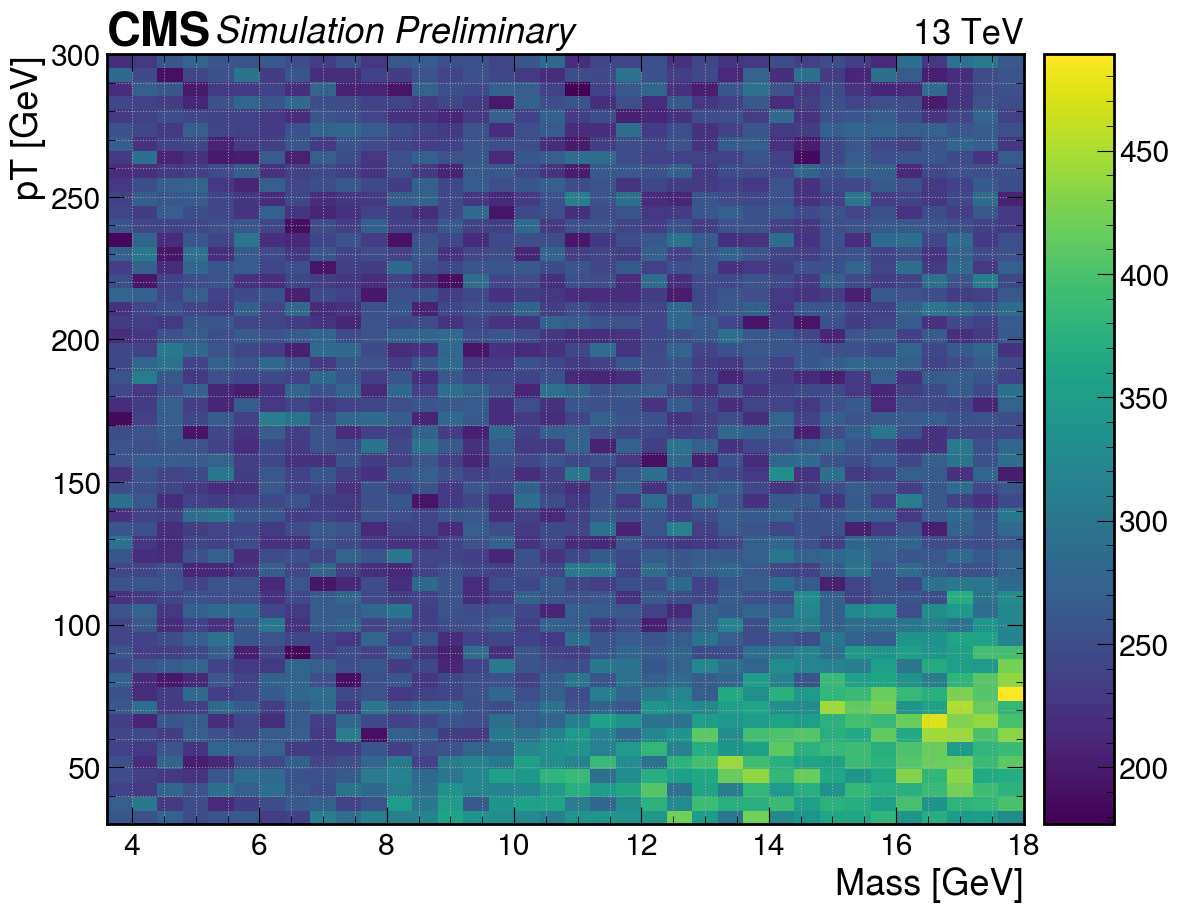

In [34]:
fig, ax = plt.subplots(figsize=(13,10))
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 1000, vcenter=800)
out["train_mass_phy_9"]["a_mass_pt"].plot2d(ax=ax)
# ax.set_xticks(np.arange(3.2, 17.2, 0.4), minor=True)
# ax.set_yticks(np.arange(20, 200, 5), minor=True)
# plt.xticks(np.arange(3.2,17.2,1.2))
plt.grid(which='both')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

In [35]:
# Access the 2D histogram
A_mass_pt = out["train_mass_phy_9"]["a_mass_pt"]

# Get the edges for each axis
mass_edges = A_mass_pt.axes[0].edges
pt_edges = A_mass_pt.axes[1].edges

# Print the bin edges
print("Mass Bin Edges:", mass_edges)
print("Pt Bin Edges:", pt_edges)

# Get the bin entries (counts in each bin)
bin_entries = A_mass_pt.values()

# print("min: ",min(bin_entries.flatten()), "max: ", max(bin_entries.flatten()), "mean: ", np.mean(bin_entries.flatten()))
outlist =bin_entries.flatten()
print("min---", min(outlist), "max---", max(outlist), "mean---", np.mean(outlist))
outstr = ""
# for i in range(len(outlist)):
for i in range(len(np.arange(3.6,18.1,0.4))*len(np.arange(35,301,5))):
  if (i%len(np.arange(35,301,5)) == 0) and (i != 0):
    outstr += '\n'
  outstr += str(int(outlist[i])) + ', '

print(outstr)

Mass Bin Edges: [ 3.6  4.   4.4  4.8  5.2  5.6  6.   6.4  6.8  7.2  7.6  8.   8.4  8.8
  9.2  9.6 10.  10.4 10.8 11.2 11.6 12.  12.4 12.8 13.2 13.6 14.  14.4
 14.8 15.2 15.6 16.  16.4 16.8 17.2 17.6 18. ]
Pt Bin Edges: [ 30.          34.82142857  39.64285714  44.46428571  49.28571429
  54.10714286  58.92857143  63.75        68.57142857  73.39285714
  78.21428571  83.03571429  87.85714286  92.67857143  97.5
 102.32142857 107.14285714 111.96428571 116.78571429 121.60714286
 126.42857143 131.25       136.07142857 140.89285714 145.71428571
 150.53571429 155.35714286 160.17857143 165.         169.82142857
 174.64285714 179.46428571 184.28571429 189.10714286 193.92857143
 198.75       203.57142857 208.39285714 213.21428571 218.03571429
 222.85714286 227.67857143 232.5        237.32142857 242.14285714
 246.96428571 251.78571429 256.60714286 261.42857143 266.25
 271.07142857 275.89285714 280.71428571 285.53571429 290.35714286
 295.17857143 300.        ]
min--- 177 max--- 489 mean--- 262.815972